1-	Do higher and lower temperatures have an impact on energy consumption? 

In [1]:
#dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from pathlib import Path
import hvplot.pandas
import requests
import json

In [2]:
#import files and read the data
main_data_path = Path("Resources/projectdata.csv")
main_data = pd.read_csv(main_data_path)
pd.options.display.float_format = '{:.2f}'.format
main_data

,Unnamed: 0,Country,Average Temp,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),co2 Emissions (metric tons per capita),Latitude,Longitude,2020 Population,Renewable energy consumption per capita (kWh/person)
0,0,Algeria,19.46,0.16,75.85,0.00,0.84,1.10,16259.05,171250.00,28.03,1.66,43451666,26.01
1,1,Angola,25.89,54.69,4.38,0.00,11.02,71.56,3667.42,25210.00,-11.20,17.87,33428485,2005.71
2,2,Antigua and Barbuda,26.73,0.91,0.33,0.00,0.01,2.94,33027.52,520.00,17.06,-61.80,92664,300.55
3,3,Argentina,17.92,10.74,90.56,7.97,34.63,31.99,20725.17,168100.00,-38.42,-63.62,45036032,2225.88
4,4,Austria,14.14,33.77,16.22,0.00,54.64,77.11,48314.26,64770.00,47.52,14.55,8907777,16315.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,98,United Arab Emirates,28.66,0.67,125.85,0.00,3.80,2.93,134878.39,188860.00,23.42,53.85,9287289,903.69
99,99,United Kingdom,10.47,12.24,144.99,56.18,120.48,54.92,32893.76,348920.00,55.38,-3.44,67059474,4026.20
100,100,United States,15.26,10.42,2588.21,809.41,760.76,37.76,79489.02,4817720.00,37.09,-95.71,335942003,8282.76
101,101,Uruguay,16.79,60.76,1.89,0.00,14.16,88.22,19985.01,6490.00,-32.52,-55.77,3429086,12142.89


The r-squared is: 0.07426043111699936


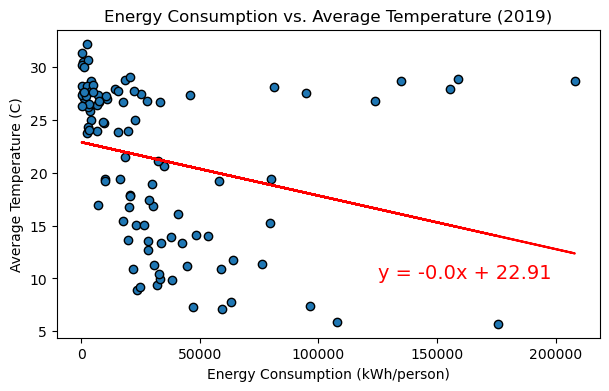

In [3]:
#scatter plot showing the correlation between temp and primary energy consumption
energy_consumption = main_data["Primary energy consumption per capita (kWh/person)"]
temperature = main_data["Average Temp"]

plt.figure(figsize=(7,4))
plt.scatter(energy_consumption, temperature, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Energy Consumption (kWh/person)')
plt.ylabel('Average Temperature (C)')
plt.title('Energy Consumption vs. Average Temperature (2019)')

#add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(energy_consumption, temperature)
regress_values = energy_consumption * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(energy_consumption, temperature)
print(f"The r-squared is: {rvalue**2}")
plt.plot(energy_consumption, regress_values, "r-")
plt.annotate(line_eq, (125000, 10), fontsize=14,color="red")

# Save the figure
plt.savefig("output_data/Energy Consumption vs. Average Temperature (2019).png")

# Show plot
plt.show()

Analysis: The is a no/very weak correlation between energy consumption and average temperature with entire data.

In [4]:
#create two data frames (high and low temperatures)

high_temps = main_data.loc[main_data['Average Temp'] >= 25]
low_temps = main_data.loc[main_data['Average Temp'] <= 10]


The r-squared is: 0.0028583229372739416


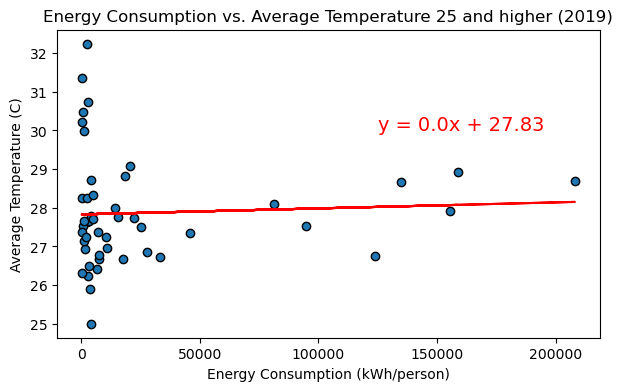

In [5]:
#scatter plot showing the correlation between temp and primary energy consumption in high temp 
energy_consumption = high_temps["Primary energy consumption per capita (kWh/person)"]
temperature = high_temps["Average Temp"]

plt.figure(figsize=(7,4))
plt.scatter(energy_consumption, temperature, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Energy Consumption (kWh/person)')
plt.ylabel('Average Temperature (C)')
plt.title('Energy Consumption vs. Average Temperature 25 and higher (2019)')

#add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(energy_consumption, temperature)
regress_values = energy_consumption * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(energy_consumption, temperature)
print(f"The r-squared is: {rvalue**2}")
plt.plot(energy_consumption, regress_values, "r-")
plt.annotate(line_eq, (125000, 30), fontsize=14,color="red")

# Save the figure
plt.savefig("output_data/Energy Consumption vs. Average Temperature 25 and higher (2019).png")

# Show plot
plt.show()

Analysis: There is no correlation between energy consumption and countries with average temperatures 25 and higher.

The r-squared is: 0.7053782565845196


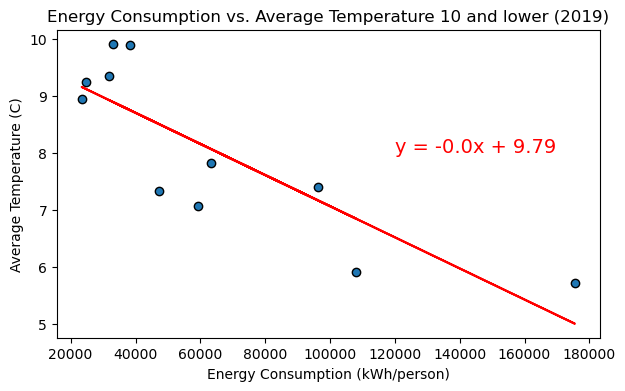

In [6]:
#scatter plot showing the correlation between temp and primary energy consumption in low temp 
energy_consumption = low_temps["Primary energy consumption per capita (kWh/person)"]
temperature = low_temps["Average Temp"]

plt.figure(figsize=(7,4))
plt.scatter(energy_consumption, temperature, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Energy Consumption (kWh/person)')
plt.ylabel('Average Temperature (C)')
plt.title('Energy Consumption vs. Average Temperature 10 and lower (2019)')

#add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(energy_consumption, temperature)
regress_values = energy_consumption * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(energy_consumption, temperature)
print(f"The r-squared is: {rvalue**2}")
plt.plot(energy_consumption, regress_values, "r-")
plt.annotate(line_eq, (120000, 8), fontsize=14,color="red")

# Save the figure
plt.savefig("output_data/Energy Consumption vs. Average Temperature 10 and lower (2019).png")

# Show plot
plt.show()

Analysis: There is a moderate/strong correlation between energy consumption and countries with an average temperature of 10 or lower.

In [7]:
#find outliers within the data
energyoutliers = main_data["Primary energy consumption per capita (kWh/person)"]
quartiles = energyoutliers.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

main_data_outliers = main_data.loc[main_data['Primary energy consumption per capita (kWh/person)'] >= 88321.71742500001]
outliers = main_data_outliers['Country'].to_list()
print(f"{outliers} could be outliers.")

The lower quartile of temperatures is: 4599.5175500000005
The upper quartile of temperatures is: 38088.3975
The interquartile range of temperatures is: 33488.87995
The the median of temperatures is: 20460.55 
Values below -45633.802375 could be outliers.
Values above 88321.71742500001 could be outliers.
['Bahrain', 'Canada', 'Iceland', 'Kuwait', 'Norway', 'Qatar', 'Singapore', 'Trinidad and Tobago', 'United Arab Emirates'] could be outliers.


The r-squared is: 0.40616752081275864


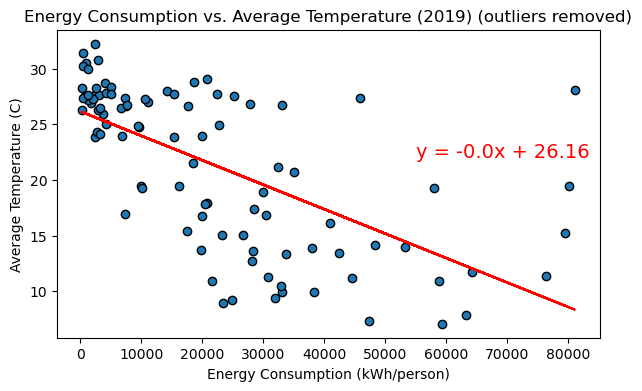

In [8]:
#remove outliers and complete new linear regression plot
main_data_no_outliers = main_data.loc[main_data['Primary energy consumption per capita (kWh/person)'] < 88321.71742500001]

energy_consumption = main_data_no_outliers["Primary energy consumption per capita (kWh/person)"]
temperature = main_data_no_outliers["Average Temp"]

plt.figure(figsize=(7,4))
plt.scatter(energy_consumption, temperature, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Energy Consumption (kWh/person)')
plt.ylabel('Average Temperature (C)')
plt.title('Energy Consumption vs. Average Temperature (2019) (outliers removed)')

#add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(energy_consumption, temperature)
regress_values = energy_consumption * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(energy_consumption, temperature)
print(f"The r-squared is: {rvalue**2}")
plt.plot(energy_consumption, regress_values, "r-")
plt.annotate(line_eq, (55000, 22), fontsize=14,color="red")

# Save the figure
plt.savefig("output_data/Energy Consumption vs. Average Temperature (2019) - no outliers.png")

# Show plot
plt.show()

Analysis: There is a weak correlation between energy consumption and average temperature, after removing outliers.